## Importing the required libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import imageio

## Importing dataset

Our input consists of an image where each pixel in the image is a point in the 3-dimensional space consisting of Red, Blue and Green Intensities. Values of all the pixels in the image are divided by 255 in order to scale each pixel to be a value between [0, 1]. We can see that the image contains 759 rows, 506 columns and 3 channels.

In [39]:
img = imageio.imread('temp.jpg') 
print(img.shape)

(759, 506, 3)


In [40]:
img = img / 255 

## Training Model

We first reshape the input image into a 2D matrix such that its shape becomes of the form $\text{(number of pixels)*(number of channels)}$. Then, we run a maximum of 5 iteration of the K Means Algorithm to classify each pixel into a cluster.

The cluster centres ($\mu$ values) are initially chosen at random from the dataset. For every pixel in the image, we first find the distance between each pixel and the cluster centre. The cluster centre which has the minimum distance from a certain pixel is finally chosen. It can be shown as follows:

$$ r_{nk} = 1 \text{ if } k = \underset{j}{\operatorname{\argmin}} ||x_n - \mu_j||^2  $$
$$ r_{nk} = 0 \text{ otherwise} $$

Once, all the pixels are classified into a certain cluster, the cluster centres are recomputed using the following:

$$ \mu_k = \frac{\sum_{n = 1}^{N} r_{nk}*\textbf{x}_n}{\sum_{n = 1}^{N} r_{nk}} $$

The above algorithm is run for 5 iterations.


In [43]:
def K_Means(img, k):

    # flattening the image into a 2D matrix such that its shape becomes (number of pixels, number of channels)
    x = np.reshape(img, (img.shape[0] * img.shape[1],img.shape[2])) 
    
    # the initial clusters are chosen randomly from the input image
    random_indexes = np.random.choice(len(x), k)
    mu = x[random_indexes] 
    # stores the cluster index to which the current pixel belongs
    z = np.zeros(len(x), dtype=np.int8)
    
    # choosing the maximum number of iterations instead of waiting for convergence
    max_iterations = 5
    for iteration in range(max_iterations):
        for curr_pixel in range(len(x)):
            # calculating the norm for the first mu value
            dist = np.linalg.norm(x[curr_pixel] - mu[0])
            # checking for a nearer cluster centre
            for cluster_no in range(1, len(mu)):
                temp = np.linalg.norm(x[curr_pixel]-mu[cluster_no])
                # if we find a shorter distance between another cluster centre -> update the cluster centre for current pixel
                if temp<dist:
                    dist=temp
                    z[curr_pixel] = cluster_no

        mu = np.zeros((k,len(x[0])))
        # used to store the number of points that belong to each cluster
        count = np.zeros(k)
        
        # updating the mu values
        for curr_pixel in range(len(x)):
            # adding x_i to the mu value of the cluster to which it belongs
            mu[z[curr_pixel]] += x[curr_pixel]
            count[z[curr_pixel]] += 1

        count = count.reshape((k,1))
        
        for cluster_no in range(k):
            if count[cluster_no]!=0:
                mu[cluster_no] /= count[cluster_no]

    return mu, z

## Running K Means on input Data

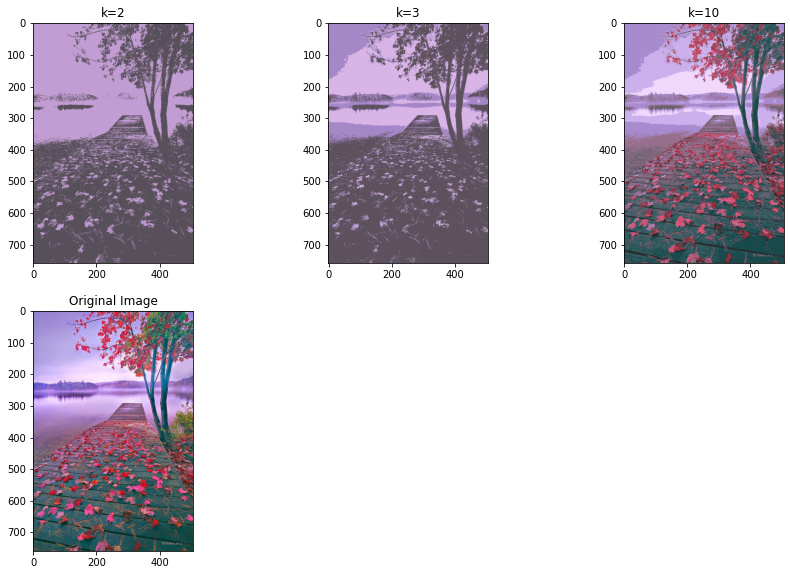

In [44]:
i=1
plt.figure(figsize=(15,15))
# choosing the following values as total number of clusters
k_values =  [2,3,10,-1]

for k in k_values:
    plt.subplot(3,3,i)
    if k!=-1:
        # computing the cluster centres and the cluster to which each pixel belongs using K Means algorithm
        mu,z = K_Means(img,k)
        centroid = np.array(mu)
        # generating the image 
        newImg = centroid[z, :] 
        newImg = np.reshape(newImg, (img.shape[0], img.shape[1],img.shape[2]))
        plt.title("k={}".format(k))
        plt.imshow(newImg)
    else:
        plt.title('Original Image')
        plt.imshow(img)
    i+=1